## Задача 1

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат. В качестве ответа запишите значение коэффициента детерминации для модели на этих признаках.

In [43]:
import numpy as np
from sklearn.linear_model import LinearRegression
from itertools import combinations

In [47]:
x = np.array([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])
y = np.array([9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

In [62]:
pairs = list(combinations(range(4), r = 2))

In [63]:
for pair1, pair2 in pairs:
    x1 = x[:, [pair1, pair2]]
    lr = LinearRegression().fit(x1, y)
    print (f'На признаках {pair1} и {pair2} коэффициент детерминации равен {lr.score(x1, y)}')

На признаках 0 и 1 коэффициент детерминации равен 0.18113594742585226
На признаках 0 и 2 коэффициент детерминации равен 0.7634246238793152
На признаках 0 и 3 коэффициент детерминации равен 0.4532966783144078
На признаках 1 и 2 коэффициент детерминации равен 0.5479482734039012
На признаках 1 и 3 коэффициент детерминации равен 0.6062055761129932
На признаках 2 и 3 коэффициент детерминации равен 0.6224419876505322


### Ответ:
На признаках 0 и 2 коэффициент детерминации максимальный и равен 0.76

## Задача 2

Является ли значимым уравнение регрессии, полученное в предыдущей задаче? В качестве ответа запишите 1, если является, и 0 иначе.

In [69]:
from scipy import stats

In [70]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

In [71]:
n = x1.shape[0]
m = 2

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

In [72]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

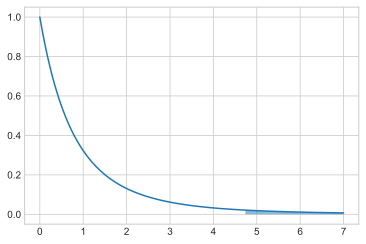

In [73]:
ox = np.linspace(0, 7, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 7, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

In [74]:
R2 = 0.76

F = (R2 / k1) / ((1 - R2) / k2)
F

11.083333333333332

### Ответ:
Статистика попала в критическую область, уравнение регрессии признаётся значимым. Ответ 1

## Задача 3

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`? В качестве ответа запишите 1, если является, и 0 иначе.

_Подсказка_. Реализуйте двухвыборочный t-тест. В качестве выборок здесь можно взять наборы меток совершения покупки (0 или 1) каждым посетителем.

In [76]:
A = np.append(np.zeros((2509 - 77)), np.ones((77)))
B = np.append(np.zeros((1465 - 60)), np.ones((60)))

In [77]:
n1 = A.size
n2 = B.size

s1 = A.std(ddof=1)
s2 = B.std(ddof=1)

In [78]:
s_delta = np.sqrt(s1 ** 2 / n1 + s2 ** 2 / n2)
s_delta

0.006220171278295827

In [79]:
t = (A.mean() - B.mean()) / s_delta

t

-1.6504551408398205

In [80]:
df = (s1 ** 2 / n1 + s2 ** 2 / n2) ** 2 / \
    ((s1 ** 2 / n1) ** 2 / (n1 - 1) + (s2 ** 2 / n2) ** 2 / (n2 - 1))

df

2732.8025644352133

In [81]:
alpha = 0.05

t1 = stats.t.ppf(alpha / 2, df=df)
t2 = stats.t.ppf(1 - alpha / 2, df=df)

t1, t2

(-1.9608324352746576, 1.9608324352746571)

Значение статистики попало в критическую область. Гипотеза о значимости отличия конверсии на страницах A и B отвергается. Ответ 0